In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import numpy as np
np.random.seed(13)

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import sequence

In [10]:
# visualization
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

In [11]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window size of filter

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
nb_epoch = 3
model = Sequential()
#CNN First Layer: need to specify input_shape
model.add(Convolution2D(nb_filters, (nb_conv, nb_conv), input_shape=(img_rows, img_cols,1)))#input_shape=(image_width, image_heigth, 1(Black/White image) or 3(Color image))
model.add(Activation('relu'))

#CNN Hidden Layers
model.add(Convolution2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

#Flatten
model.add(Flatten())

#NN Hidden Layers
model.add(Dense(128))
model.add(Activation('relu'))

#NN Last Layer
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=256, verbose=2,  validation_split=0.2)

Epoch 1/3
188/188 - 7s - loss: 2.3268 - accuracy: 0.0796 - val_loss: 2.3205 - val_accuracy: 0.0860 - 7s/epoch - 36ms/step
Epoch 2/3
188/188 - 6s - loss: 2.3146 - accuracy: 0.0918 - val_loss: 2.3081 - val_accuracy: 0.1000 - 6s/epoch - 32ms/step
Epoch 3/3
188/188 - 6s - loss: 2.3023 - accuracy: 0.1051 - val_loss: 2.2955 - val_accuracy: 0.1162 - 6s/epoch - 33ms/step


In [17]:
model.layers

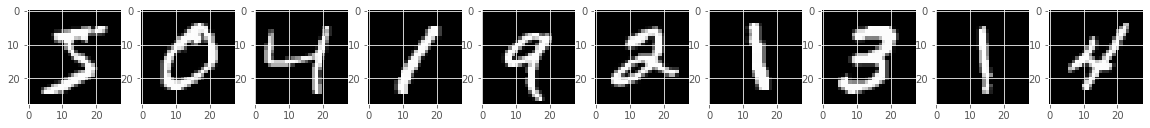

In [18]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw_digit(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

(10, 3, 3, 5)


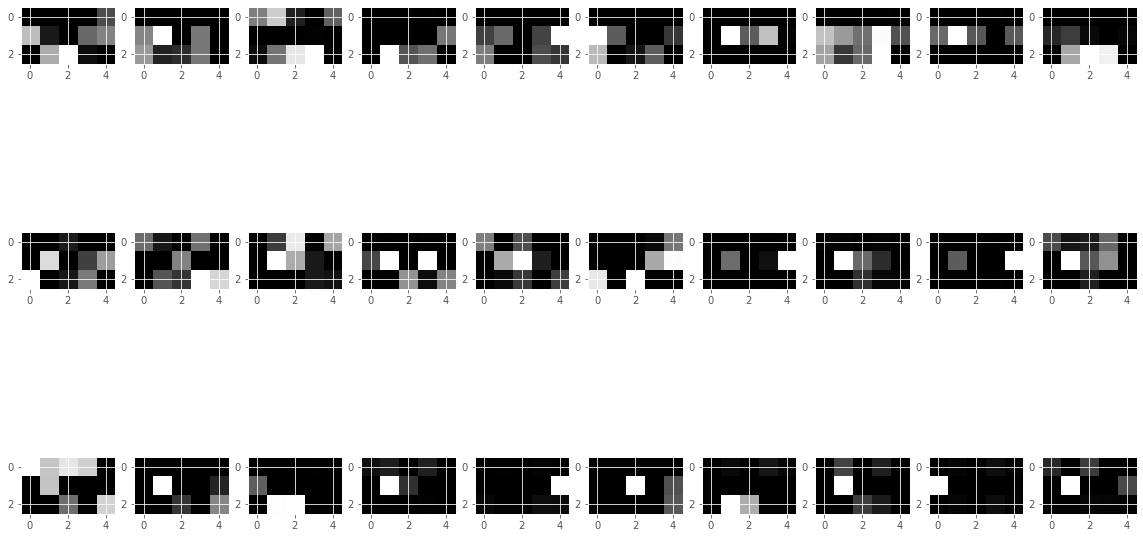

In [19]:
get_second_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
second_output = get_second_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))
print(second_output.shape)

for img_index, filters in enumerate(second_output, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()

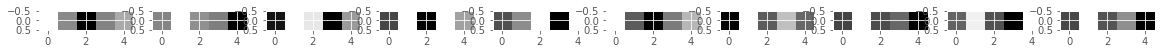

In [20]:
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layers = get_3rd_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()